# Authors
- Filip Finfando
- Javier de la Rúa Martínez

# Introduction
This document is a report created as an assignment for ID2222 course at KTH. The main goal of the assignment was to implement the apriori algorithm to extract the frequent itemsets of a sale transaction dataset with a predefined support. Additionally, the extraction of association rules with a specific confidence based on these frequent itemsets have been developed. We used the given dataset of sale transactions. This dataset, together with some test datasets can be found in 'test/data' folder in the repository.

# Solution
We  decided  to  develop  a  project  in Python 3.7 using  popular  libraries  provided in `requirements.txt` file in the repository.  The whole repository itself is attached to this report. In order to fulfill the task assigned we implemented the following scripts:
1. Run, main scripts to run the tests and print the results.
2. Apriori, representing  an instance of the apriori algorithm and providing methods for extracting candidates, frequent itemsets and association rules.

# Running
In order for the solution to run, Python 3.7 has to be installed.  We recommend creating a virtual environment for the purpose of evaluating the solution. One can either use command line `python run.py` or run the programme in attached jupyter notebook: `ID2222 HM2 - Discovery of Frequent Itemsets and Association Rules.ipynb`. Below is the output of the jupyter notebook presenting the example run of the program. Due to the extend of the output considering the number of association rules and the time of execution, the experiment is run over the first 300 elements of the dataset.

# Creating Apriori instance and generating baskets

In [1]:
import os
from apriori import Apriori

PATH = os.getcwd() + "/test/data/T10I4D100K.dat"
SUPPORT = 6
CONFIDENCE = 0.75
N = 300

# create a new instance of Apriori
apriori = Apriori(PATH, n=N, sep=' ', duplicates=False, verbose=True)

for basket in apriori.baskets[:10]:
    print(basket)

Reading 300 lines...
['25', '52', '164', '240', '274', '328', '368', '448', '538', '561', '630', '687', '730', '775', '825', '834']
['39', '120', '124', '205', '401', '581', '704', '814', '825', '834']
['35', '249', '674', '712', '733', '759', '854', '950']
['39', '422', '449', '704', '825', '857', '895', '937', '954', '964']
['15', '229', '262', '283', '294', '352', '381', '708', '738', '766', '853', '883', '966', '978']
['26', '104', '143', '320', '569', '620', '798']
['7', '185', '214', '350', '529', '658', '682', '782', '809', '849', '883', '947', '970', '979']
['227', '390']
['71', '192', '208', '272', '279', '280', '300', '333', '496', '529', '530', '597', '618', '674', '675', '720', '855', '914', '932']
['183', '193', '217', '256', '276', '277', '374', '474', '483', '496', '512', '529', '626', '653', '706', '878', '939']


## Candidates and frequent items per iteration

In [2]:
# get candidates and frequent itemsets
candidates, frequent_itemsets = apriori.compute(support=SUPPORT, verbose=False)

print("Frequent items:")
for i in range(0, len(frequent_itemsets)):
    print("L{}: {}\n".format(i, list(frequent_itemsets[i])))

Frequent items:
L0: [frozenset({'283'}), frozenset({'874'}), frozenset({'606'}), frozenset({'788'}), frozenset({'883'}), frozenset({'471'}), frozenset({'39'}), frozenset({'780'}), frozenset({'175'}), frozenset({'464'}), frozenset({'798'}), frozenset({'354'}), frozenset({'516'}), frozenset({'970'}), frozenset({'280'}), frozenset({'183'}), frozenset({'981'}), frozenset({'885'}), frozenset({'720'}), frozenset({'888'}), frozenset({'204'}), frozenset({'387'}), frozenset({'966'}), frozenset({'998'}), frozenset({'682'}), frozenset({'394'}), frozenset({'296'}), frozenset({'692'}), frozenset({'706'}), frozenset({'350'}), frozenset({'895'}), frozenset({'132'}), frozenset({'413'}), frozenset({'884'}), frozenset({'510'}), frozenset({'722'}), frozenset({'45'}), frozenset({'494'}), frozenset({'349'}), frozenset({'944'}), frozenset({'357'}), frozenset({'855'}), frozenset({'960'}), frozenset({'912'}), frozenset({'841'}), frozenset({'279'}), frozenset({'752'}), frozenset({'368'}), frozenset({'597'}), f

## Association rules

In [3]:
association_rules = apriori.get_association_rules(confidence=CONFIDENCE, verbose=False)

print("Association rules:")
for r, (c, s) in association_rules.items():
    print("Rule: {} -> {} - Confidence: {} - Support: {}".format(list(r[0]), list(r[1]), c, s))

Association rules:
Rule: ['862', '801'] -> ['392'] - Confidence: 1.0 - Support: 6
Rule: ['862', '392'] -> ['801'] - Confidence: 0.86 - Support: 6
Rule: ['801', '392'] -> ['862'] - Confidence: 1.0 - Support: 6
Rule: ['801'] -> ['862', '392'] - Confidence: 1.0 - Support: 6
Rule: ['354', '617'] -> ['583'] - Confidence: 1.0 - Support: 6
Rule: ['354', '583'] -> ['617'] - Confidence: 1.0 - Support: 6
Rule: ['617', '583'] -> ['354'] - Confidence: 1.0 - Support: 6
Rule: ['583'] -> ['354', '617'] - Confidence: 1.0 - Support: 6
Rule: ['538', '172'] -> ['464'] - Confidence: 1.0 - Support: 6
Rule: ['538', '464'] -> ['172'] - Confidence: 1.0 - Support: 6
Rule: ['172', '464'] -> ['538'] - Confidence: 1.0 - Support: 6
Rule: ['172'] -> ['538', '464'] - Confidence: 0.75 - Support: 6
Rule: ['464'] -> ['538', '172'] - Confidence: 0.86 - Support: 6
Rule: ['801'] -> ['392'] - Confidence: 1.0 - Support: 6
Rule: ['172'] -> ['538'] - Confidence: 0.75 - Support: 6
Rule: ['583'] -> ['617'] - Confidence: 1.0 - S

# Visualization

### Scatterplot with confidence and support

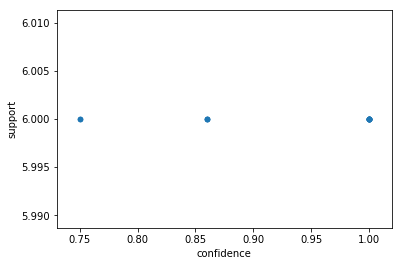

In [4]:
%matplotlib inline
import pandas as pd

df = pd.DataFrame(association_rules.values())
df.columns = ["confidence", "support"]
df.plot.scatter(x="confidence", y="support")


# Connected graph

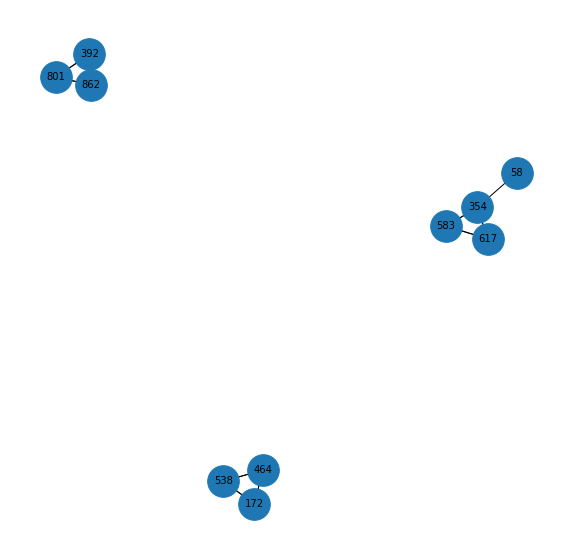

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
G = nx.DiGraph()
for r, (c, s) in association_rules.items():
    end = list(r[1])[0]
    for rx in list(r[0]):
        G.add_edge(rx, end, weight=1, arrowsize=100)
edges = [
    (u, v) for (u, v, d) in G.edges(data=True)
]
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw_networkx_nodes(G, pos, node_size=1000)
nx.draw_networkx_edges(G, pos, edgelist=edges, width=1, arrows=True)
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")
plt.axis("off")
plt.show()

# References
R. Agrawal and R. Srikant. Fast Algorithms for Mining Association Rules, VLDB '94, URL: http://www.vldb.org/conf/1994/P487.PDF